# This Template is created to make grading fair and straightforward. Anything not in the place as mentioned in the template would not be graded.

<font color='red'> # NOTE: We would run the notebook through a Plagiarism Checker. If it is found to be copied, your work would not be graded, and the incident would be highlighted to NYU Authorities. </font>

# Import Library and Dataset

In [126]:
import sklearn
import pandas as pd 

df = pd.read_csv("qudditch_training.csv", na_values='?')
df.head()

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_num,player_id,house,gender,age,weight,foul_type_id,game_move_id,penalty_id,game_duration,...,finbourgh_flick,reverse_pass,parkins_pincer,plumpton_pass,porskoff_ploy,transylvanian_tackle,woollongong_shimmy,change,snitch_caught,quidditch_league_player
0,1,8222157,Gryffindor,Female,11.0,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,55629189,Gryffindor,Female,12.0,NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,3,86047875,Slytherin,Female,13.0,NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,82442376,Gryffindor,Male,14.0,NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,42519267,Gryffindor,Male,14.5,NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# PART I: Preprocessing

#### Handling missing values. (If ANY)

In [127]:
#Remove columns with missing values more than 80%
df = df[df.columns[df.isnull().mean() < 0.8]]

#Handle missing values by replacing them with the most common example in the feature
for column in df.columns[df.isnull().sum() > 0]:
    df[column] = df[column].fillna(df[column].mode()[0])

#Dropping rows with Gender value as "Unknown/Invalid"
df = df.drop(df[df.gender=="Unknown/Invalid"].index)

df.head()

,id_num,player_id,house,gender,age,foul_type_id,game_move_id,penalty_id,game_duration,player_code,...,finbourgh_flick,reverse_pass,parkins_pincer,plumpton_pass,porskoff_ploy,transylvanian_tackle,woollongong_shimmy,change,snitch_caught,quidditch_league_player
0,1,8222157,Gryffindor,Female,11.0,6,25,1,1,MC,...,No,No,No,No,No,No,No,No,No,NO
1,2,55629189,Gryffindor,Female,12.0,1,1,7,3,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,3,86047875,Slytherin,Female,13.0,1,1,7,2,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,82442376,Gryffindor,Male,14.0,1,1,7,2,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,42519267,Gryffindor,Male,14.5,1,1,7,1,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Feature Datatype Conversion From Numeric to categoric and Vice-versa. (If ANY)

In [128]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np


df['snitchnip'] = df['snitchnip'].replace({'>200': 0, '>300': 1, 'Norm': 2, 'None': -99})
df['stooging'] = df['stooging'].replace({'>7': 0, '>8': 1, 'Norm': 2, 'None': -99})
i = ['snitchnip', 'stooging', 'player_id', 'id_num', 'foul_type_id', 'game_move_id', 'penalty_id']

df[i] = df[i].astype('object')

df['quidditch_league_player'] = df['quidditch_league_player'].replace({'NO': 0, 'YES': 1})

#df['num_games_notperformed'] = df['num_games_satout']+df['num_games_injured']+df['num_games_notpartof']

j = ['body_blow','checking','dopplebeater_defence','hawkshead_attacking_formation','no_hands_tackle',\
    'power_play','sloth_grip_roll','spiral_dive','starfish_and_stick','twirl','wronski_feint','zig-zag',\
    'bludger_backbeat','chelmondiston_charge','dionysus_dive','double_eight_loop','finbourgh_flick',\
    'reverse_pass','parkins_pincer','plumpton_pass','porskoff_ploy','transylvanian_tackle',\
    'woollongong_shimmy']

df[j] = df[j].replace({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})
df['snitch_caught'] = df['snitch_caught'].replace({'No': 0, 'Yes': 1})
df[['snitchnip', 'stooging', 'id_num', 'player_id']] = df[['snitchnip', 'stooging', 'id_num', 'player_id']].astype('int64')


df_1 = df.select_dtypes(include=[object])
le = LabelEncoder()
df_2 = df_1.apply(le.fit_transform)

def categorizeColumn(column):
    df_2[column] = df_1[column].astype('category')
    
for col in df_1.columns:
    categorizeColumn(col)

df_2 = pd.get_dummies(df_2)
df = df.drop([col for col in df_1.columns], axis=1)
df = pd.merge(df, df_2, right_index=True, left_index=True)

cols = list(df)
cols.insert(len(df.columns)-1, cols.pop(cols.index('quidditch_league_player')))
df = df.reindex(columns= cols)
df.head()

,id_num,player_id,age,game_duration,num_game_moves,num_game_losses,num_practice_sessions,num_games_satout,num_games_injured,num_games_notpartof,...,player_type_Beater1,player_type_Beater2,player_type_Captain,player_type_Chaser1,player_type_Chaser2,player_type_Chaser3,player_type_Keeper,player_type_Multiple,player_type_Seeker,quidditch_league_player
0,1,8222157,11.0,1,41,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,55629189,12.0,3,59,0,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,86047875,13.0,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,82442376,14.0,2,44,1,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,42519267,14.5,1,51,0,8,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Feature Reduction or extraction. (If ANY)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from scipy import stats

#df = df.drop(['num_games_satout', 'num_games_injured', 'num_games_notpartof'], axis=1)

#Reduction of feature which has only one distinct example. Hence, has no effect on the classification.
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(col, axis=1)

num_col = ['age', 'game_duration', 'num_game_moves', 'num_game_losses', 'num_practice_sessions', 'num_games_won',\
           'num_games_satout', 'num_games_injured', 'num_games_notpartof']
for col in num_col:
    if len(df[df[col] == 0])/len(df) <=0.02:
        df = df[df[col] > 0]
        df[col] = np.log(df[col])
    else:
        df = df[df[col] >= 0]
        df[col] = np.log1p(df[col])

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[num_col])
df[num_col] = scaled_df

"""
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))
df[num_col] = standardize(df[num_col])

#Reduction of feature that has more than 95% co-relation with any other feature
df_temp = df.drop(['quidditch_league_player'], axis=1)
corr_matrix = df_temp.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)

#Selecting features based on Random Forest
to_drop = ['id_num', 'quidditch_league_player'] #Dropping id features and label feature
df1 = df.drop(to_drop, axis=1)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(df1, df['quidditch_league_player'])
selected_feat=[col for col in df1.columns[(sel.get_support())]] + to_drop
df = df[selected_feat]
"""
df.shape

(101263, 193)

In [130]:
df = df[(np.abs(stats.zscore(df[num_col])) < 3).all(axis=1)]
df.shape

(87274, 193)

#### Any other Pre-processing Used. (Give the name along with the code.)

In [135]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ~df.columns.isin(['quidditch_league_player', 'id_num', 'player_id'])]
y = df.loc[:, df.columns == 'quidditch_league_player']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [132]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_X,columns=columns )
y_train= pd.DataFrame(data=os_data_y,columns=['quidditch_league_player'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train))
print("Number of no in oversampled data",len(y_train[y_train['quidditch_league_player']==0]))
print("Number of yes in oversampled data",len(y_train[y_train['quidditch_league_player']==1]))
print("Proportion of no data in oversampled data is ",len(y_train[y_train['quidditch_league_player']==0])/len(X_train))
print("Proportion of yes data in oversampled data is ",len(y_train[y_train['quidditch_league_player']==1])/len(X_train))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  109082
Number of no in oversampled data 54541
Number of yes in oversampled data 54541
Proportion of no data in oversampled data is  0.5
Proportion of yes data in oversampled data is  0.5


You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


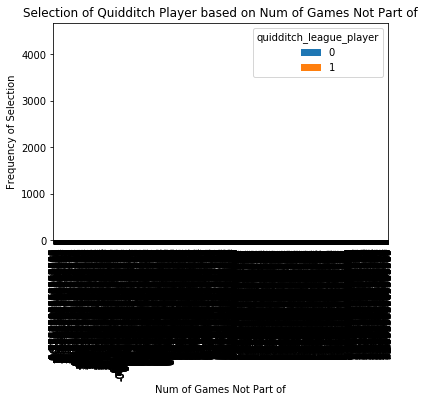

In [10]:
#!pip install matplotlib
import matplotlib.pyplot as plt
pd.crosstab(X_train["num_games_notperformed"],y_train.quidditch_league_player).plot(kind='bar')
plt.title('Selection of Quidditch Player based on Num of Games Not Part of')
plt.xlabel('Num of Games Not Part of')
plt.ylabel('Frequency of Selection')
plt.savefig('pur_numofgamesnotpartof_bar')
plt.show()

# PART II: Classification

### Model 1:
Model Name:-----------<br>
Evaluation method and metric used Name:-----------<br>
Name of the Hyperparameter used:--------------......<br>


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(fit_intercept=True, penalty='l1', class_weight='balanced')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=10))))
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Cross Validation Score: 61.88%


C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression on test set: 0.62


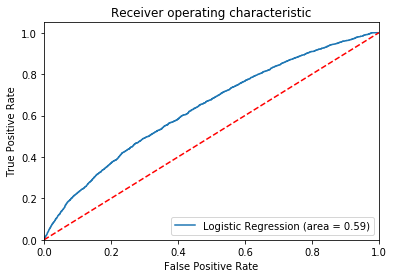

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logreg_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOGREG_ROC')
plt.show()

### Model 2:
Model Name:-----------<br>
Evaluation method and metric used Name:-----------<br>
Name of the Hyperparameter used:--------------......<br>


In [133]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(max_depth=10, max_features=None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)
print('Accuracy of dtree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))
print(sorted(zip(map(lambda x: round(x, 4), dtree.feature_importances_), X_test.columns), reverse=True))

Accuracy of dtree classifier on test set: 0.88
[(0.2831, 'num_games_notpartof'), (0.2053, 'player_code_MC'), (0.1105, 'move_specialty_specialty19'), (0.1019, 'game_move_id_1'), (0.0527, 'age'), (0.0519, 'game_move_id_3'), (0.0416, 'num_games_won'), (0.0342, 'game_move_id_22'), (0.0323, 'player_type_Chaser1'), (0.0206, 'reverse_pass'), (0.0105, 'player_code_SP'), (0.0058, 'body_blow'), (0.0057, 'game_duration'), (0.0046, 'gender_Female'), (0.0036, 'foul_type_id_3'), (0.0032, 'player_code_MD'), (0.003, 'snitch_caught'), (0.0027, 'game_move_id_11'), (0.0026, 'player_type_Chaser2'), (0.0023, 'num_practice_sessions'), (0.0022, 'player_code_HM'), (0.0021, 'move_specialty_specialty12'), (0.0019, 'num_game_losses'), (0.0017, 'player_code_DM'), (0.0016, 'player_type_Chaser3'), (0.0016, 'game_move_id_6'), (0.0012, 'foul_type_id_2'), (0.0011, 'game_move_id_5'), (0.001, 'penalty_id_6'), (0.0009, 'player_type_Seeker'), (0.0008, 'player_code_BC'), (0.0006, 'move_specialty_specialty63'), (0.0004, 'sp

[[22687   701]
 [ 2568   227]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     23388
           1       0.24      0.08      0.12      2795

   micro avg       0.88      0.88      0.88     26183
   macro avg       0.57      0.53      0.53     26183
weighted avg       0.83      0.88      0.85     26183



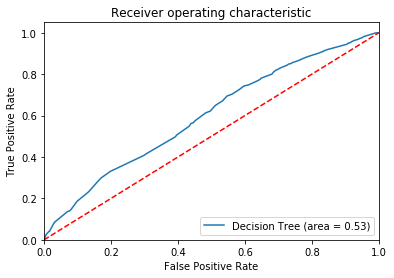

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DTree_ROC')
plt.show()

### Model 3:
Model Name:-----------<br>
Evaluation method and metric used Name:-----------<br>
Name of the Hyperparameter used:--------------......<br>


In [144]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, max_features=None, min_samples_leaf=30, class_weight={0: 1, 1: 50})
rfm.fit(X_train, y_train)
y_pred= rfm.predict(X_test)
print('Accuracy of rfm classifier on test set: {:.2f}'.format(rfm.score(X_test, y_test)))
print(sorted(zip(map(lambda x: round(x, 4), rfm.feature_importances_), X_test.columns), reverse=True))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of rfm classifier on test set: 0.33
[(0.1645, 'num_game_moves'), (0.1146, 'num_practice_sessions'), (0.0673, 'game_duration'), (0.0504, 'game_move_id_11'), (0.0492, 'num_games_won'), (0.0468, 'age'), (0.0449, 'num_game_losses'), (0.0426, 'num_games_notpartof'), (0.0311, 'game_move_id_1'), (0.028, 'reverse_pass'), (0.0151, 'move_specialty_specialty19'), (0.0149, 'change'), (0.0142, 'stooging'), (0.0134, 'body_blow'), (0.0131, 'player_code_MC'), (0.0128, 'player_type_Chaser1'), (0.0123, 'snitch_caught'), (0.0122, 'player_type_Chaser2'), (0.012, 'gender_Female'), (0.0119, 'gender_Male'), (0.0118, 'foul_type_id_1'), (0.01, 'penalty_id_7'), (0.0092, 'house_Gryffindor'), (0.0081, 'spiral_dive'), (0.0077, 'num_games_satout'), (0.0077, 'foul_type_id_3'), (0.0076, 'penalty_id_1'), (0.0072, 'player_type_Multiple'), (0.0068, 'foul_type_id_2'), (0.0065, 'game_move_id_22'), (0.0062, 'player_type_Keeper'), (0.0057, 'player_type_Beater2'), (0.0057, 'player_code_BC'), (0.0053, 'player_type_Ch

[[18959  4439]
 [ 1691  1094]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     23398
           1       0.20      0.39      0.26      2785

   micro avg       0.77      0.77      0.77     26183
   macro avg       0.56      0.60      0.56     26183
weighted avg       0.84      0.77      0.80     26183



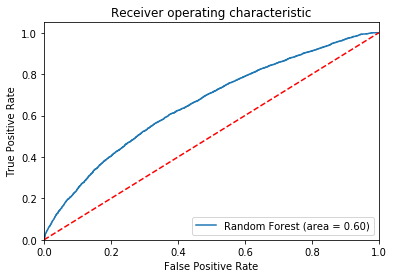

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
rfm_roc_auc = roc_auc_score(y_test, rfm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFM_ROC')
plt.show()

In [139]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
brf = BalancedRandomForestClassifier(n_estimators=100)
brf.fit(X_train, y_train)
y_pred= brf.predict(X_test)
print('Accuracy of rfm classifier on test set: {:.2f}'.format(brf.score(X_test, y_test)))
print('Balanced Accuracy score of rfm classifier on test set: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred)))
print(sorted(zip(map(lambda x: round(x, 4), brf.feature_importances_), X_test.columns), reverse=True))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy of rfm classifier on test set: 0.60
Balanced Accuracy score of rfm classifier on test set: 0.61
[(0.0881, 'num_game_moves'), (0.0815, 'num_practice_sessions'), (0.0627, 'game_duration'), (0.0626, 'num_games_notpartof'), (0.0469, 'age'), (0.0443, 'num_games_won'), (0.0411, 'num_game_losses'), (0.0313, 'reverse_pass'), (0.0214, 'game_move_id_1'), (0.0182, 'stooging'), (0.0167, 'num_games_satout'), (0.0162, 'player_type_Chaser1'), (0.0149, 'gender_Male'), (0.0148, 'gender_Female'), (0.0146, 'change'), (0.0146, 'body_blow'), (0.0145, 'move_specialty_specialty19'), (0.0142, 'game_move_id_11'), (0.0135, 'game_move_id_22'), (0.0129, 'sloth_grip_roll'), (0.0129, 'player_code_MC'), (0.0124, 'game_move_id_3'), (0.0122, 'house_Gryffindor'), (0.0121, 'spiral_dive'), (0.0121, 'foul_type_id_1'), (0.0118, 'player_type_Multiple'), (0.0118, 'house_Slytherin'), (0.0117, 'penalty_id_7'), (0.0111, 'snitch_caught'), (0.0111, 'player_type_Chaser2'), (0.0109, 'penalty_id_1'), (0.0108, 'foul_type_id_

In [140]:
from imblearn.ensemble import RUSBoostClassifier
X = df.loc[:, ~df.columns.isin(['quidditch_league_player', 'id_num', 'player_id'])]
y = df.loc[:, df.columns == 'quidditch_league_player']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rusboost = RUSBoostClassifier(random_state=0)
rusboost.fit(X_train, y_train)
y_pred= rusboost.predict(X_test)
print('Accuracy of rfm classifier on test set: {:.2f}'.format(rusboost.score(X_test, y_test)))
print('Balanced Accuracy score of rfm classifier on test set: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred)))
print(sorted(zip(map(lambda x: round(x, 4), rusboost.feature_importances_), X_test.columns), reverse=True))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of rfm classifier on test set: 0.84
Balanced Accuracy score of rfm classifier on test set: 0.52
[(0.0714, 'num_game_moves'), (0.0523, 'num_practice_sessions'), (0.0359, 'game_duration'), (0.0225, 'age'), (0.0199, 'num_games_won'), (0.0196, 'num_game_losses'), (0.0192, 'num_games_notpartof'), (0.0153, 'reverse_pass'), (0.0095, 'stooging'), (0.009, 'num_games_satout'), (0.0087, 'body_blow'), (0.0075, 'change'), (0.0067, 'player_type_Chaser1'), (0.0066, 'player_type_Multiple'), (0.0065, 'move_specialty_specialty41'), (0.0065, 'foul_type_id_1'), (0.0063, 'player_code_BC'), (0.0058, 'spiral_dive'), (0.0058, 'penalty_id_7'), (0.0057, 'player_type_Beater2'), (0.0056, 'sloth_grip_roll'), (0.0056, 'game_move_id_6'), (0.0051, 'move_specialty_specialty19'), (0.005, 'player_type_Chaser2'), (0.0049, 'game_move_id_3'), (0.0048, 'player_type_Chaser3'), (0.0045, 'player_type_Beater1'), (0.0045, 'gender_Male'), (0.0044, 'penalty_id_17'), (0.0044, 'house_Gryffindor'), (0.0043, 'game_move_id_1')

In [141]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
bc.fit(X_train, y_train)
y_pred= bc.predict(X_test)
print('Accuracy of rfm classifier on test set: {:.2f}'.format(bc.score(X_test, y_test)))
print('Balanced Accuracy score of rfm classifier on test set: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred)))
#print(sorted(zip(map(lambda x: round(x, 4), bc.feature_importances_), X_test.columns), reverse=True))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of rfm classifier on test set: 0.89
Balanced Accuracy score of rfm classifier on test set: 0.51


In [142]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier()
eec.fit(X_train, y_train)
y_pred= eec.predict(X_test)
print('Accuracy of rfm classifier on test set: {:.2f}'.format(eec.score(X_test, y_test)))
print('Balanced Accuracy score of rfm classifier on test set: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred)))
#rint(sorted(zip(map(lambda x: round(x, 4), eec.feature_importances_), X_test.columns), reverse=True))

C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of rfm classifier on test set: 0.64
Balanced Accuracy score of rfm classifier on test set: 0.60


In [143]:
#!pip install xgboost
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
    learning_rate =0.007, n_estimators=1000,
    max_depth=5, min_child_weight=3, gamma=0.4,subsample=0.55,colsample_bytree=0.85,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
# modelfit(xgb1, train, train_X)
xgb1.fit(X_train, y_train)
y_pred= xgb1.predict(X_test)
print('Accuracy of rfm classifier on test set: {:.2f}'.format(xgb1.score(X_test, y_test)))
print('Balanced Accuracy score of rfm classifier on test set: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred)))

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Satish\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of rfm classifier on test set: 0.90
Balanced Accuracy score of rfm classifier on test set: 0.50


# PART III: Best Hypothesis:
Model Name:------------<br>
Reason:--------------<br>
Hyper-parameter Value:-----------<br>
